# 랜덤 포레스트
**랜덤 포레스트** 는 배깅(또는 페이스팅)을 적용한 결정 트리의 앙상블임.  
전형적으로 **max_samples** = 학습데이터셋의 크기.  
사이킷런에서는  BaggingClassifier에 DecisionTreeClassifier를 넣어 만들수도 있지만  
더 최적화된 **RandomForestClassifier** 를 쓰는 것이 더 좋음.

In [1]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

x, y = make_moons(n_samples=500, noise=0.3, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [3]:
rnd_clf.fit(x_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)

In [4]:
y_pred = rnd_clf.predict(x_test)

In [5]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.92

랜덤포레스트는 몇 가지 예외가 있지만 대체적으로 DecisionTreeClassifier와 BaggingClassifier의 매개변수 모두 가지고 있음.  
랜덤포레스트 알고리즘은 트리의 노드를 분할할 때 전체 특성 중에서 최선의 특성을 찾는 대신 **무작위로 선택한 특성 후보 중에서 최적의 특성을 찾는 식**으로 무작위성을 더 주입함.  
> 이는 트리를 더욱 다양하게 만들고 편향을 손해보는 대신 분산을 낮추어 전체적으로 더 훌륭한 모델을 만듦.

---
## 엑스트라 트리
랜덤포레스트에서 트리를 만들 때 각 노드는 무작위로 특성의 서브셋을 만들어 분할에 사용함.  
트리를 더욱 무작위하게 만들기 위해 최적의 임곗값을 찾는 대신(보통의 결정 트리의 경우임) **후보 특성을 사용해 무작위로 분할한 다음 그 중에서 최상의 분할을 선택**할 수도 있음.  
이와 같이 극단적으로 무작위한 트리의 랜덤 포레스트를 **익스트림 랜덤 트리** 앙상블(또는 줄여서 **엑스트라 트리** )이라고 함.  
이것도 역시 편향이 늘어나지만 분산을 낮춤.  
> 모든 노드에서 특성마다 가장 최적의 임곗값을 찾는 것이 트리 알고리즘에서 시간이 가장 많이 소요되는 작업 중 하나인데,  
엑스트라 트리는 그렇지 않아서 **일반적인 랜덤 포레스트보다 훨씬 빠름**  

In [11]:
from sklearn.ensemble import ExtraTreesClassifier

ext_clf = ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)

**ExtraTreesClassifier** 클래스를 이용하여 구현할 수 있음.  
랜덤포레스트와 같은 API를 제공함.

In [15]:
ext_clf.fit(x_train, y_train)

ExtraTreesClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)

In [16]:
ext_clf_pred = ext_clf.predict(x_test)

In [17]:
accuracy_score(y_test, ext_clf_pred)

0.92

---
## 특성 중요도
랜덤 포레스트는 **특성의 상대적 중요도를 측정하기 쉽다**는 장점이 있음  
> 어떤 특성을 사용한 노드가 평균적으로 불순도를 얼마나 감소시키는지 확인하여 특성의 중요도를 측정함.  
  
사이킷런은 학습이 끝나면 특성마다 자동으로 이 점수를 계산하고 중요도의 전체 합이 1이 되도록 결괏값을 정규화함.  
이 값은 **featrue_importances_** 변수에 저장됨.

In [19]:
from sklearn.datasets import load_iris

iris = load_iris()
x = iris["data"]
y = iris["target"]
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)

In [20]:
rnd_clf.fit(x, y)

RandomForestClassifier(n_estimators=500, n_jobs=-1)

In [22]:
for name, importance in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, importance)

sepal length (cm) 0.1031658388840251
sepal width (cm) 0.024918014602912222
petal length (cm) 0.43027868489074234
petal width (cm) 0.4416374616223203


> 이처럼 랜덤 포레스트는 특히 특성을 선택해야 할 때  
**어떤 특성이 중요한지 빠르게 확인할 수 있음**

In [23]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version=1)
x, y = mnist["data"], mnist["target"]
x_train, x_test = x[: 60000], x[60000: ]
y_train, y_test = y[: 60000], y[60000: ]

In [26]:
mnist_clf = ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)

In [27]:
mnist_clf.fit(x_train, y_train)

ExtraTreesClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)

In [32]:
import numpy as np
mnist_importances = mnist_clf.feature_importances_
img_importances = np.reshape(mnist_importances, (28, 28))
img_importances.shape

(28, 28)

<AxesSubplot:>

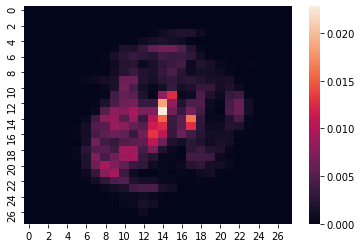

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(img_importances)

MNIST데이터셋에 적용하여 이미지상의 어떤 부분이 중요한 특성이 되는지 볼 수도 있음.